In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [22]:
df = pd.read_csv("better_life_index.csv")

In [23]:
df_num = df.drop(columns=["Country Name"])

In [24]:
df_corr = df_num.corr()
print("DataFrame df:", df.shape)
print("DataFrame df_corr:", df_corr.shape)
print("Data types and non-null counts:\n", df.dtypes, df.notnull().sum())
print("First 5 rows of df:\n", df.head())

DataFrame df: (40, 5)
DataFrame df_corr: (4, 4)
Data types and non-null counts:
 Country Name                            object
GDP per capita                         float64
Life satisfaction                      float64
Homicide rate                          float64
Feeling safe walking alone at night    float64
dtype: object Country Name                           40
GDP per capita                         40
Life satisfaction                      40
Homicide rate                          40
Feeling safe walking alone at night    40
dtype: int64
First 5 rows of df:
   Country Name  GDP per capita  Life satisfaction  Homicide rate  \
0    Australia    53316.885434                7.1            0.9   
1      Austria    55685.970293                7.2            0.5   
2      Belgium    53088.968798                6.8            1.1   
3       Brazil    14835.414927                6.1           19.0   
4       Canada    46572.137433                7.0            1.2   

   Feeling safe w

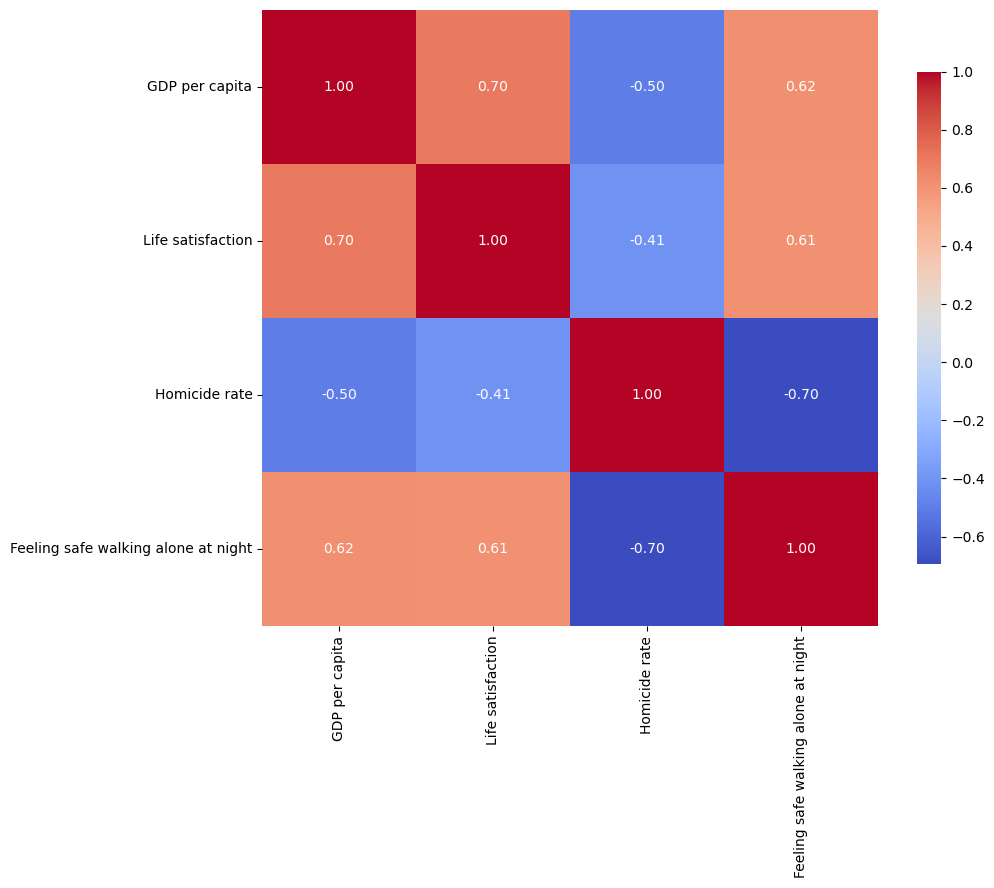

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.show()

In [26]:
gdp_corr = df_corr["GDP per capita"].drop("GDP per capita")
strongest_positive_corr = gdp_corr.idxmax()
strongest_positive_value = gdp_corr.max()
print(
    f"最も正の相関が強いのは: {strongest_positive_corr} ({strongest_positive_value:.2f})"
)

最も正の相関が強いのは: Life satisfaction (0.70)


In [27]:
strongest_negative_corr = gdp_corr.idxmin()
strongest_negative_value = gdp_corr.min()
print(
    f"最も負の相関が強いのは: {strongest_negative_corr} ({strongest_negative_value:.2f})"
)

最も負の相関が強いのは: Homicide rate (-0.50)


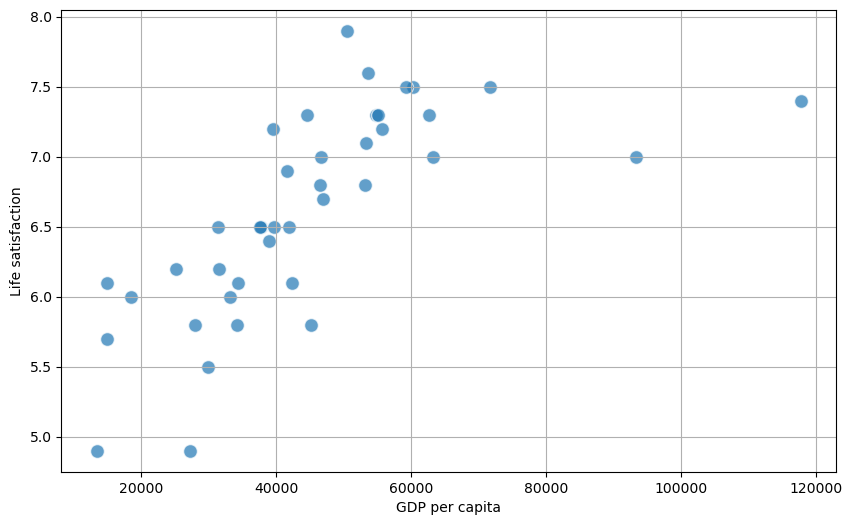

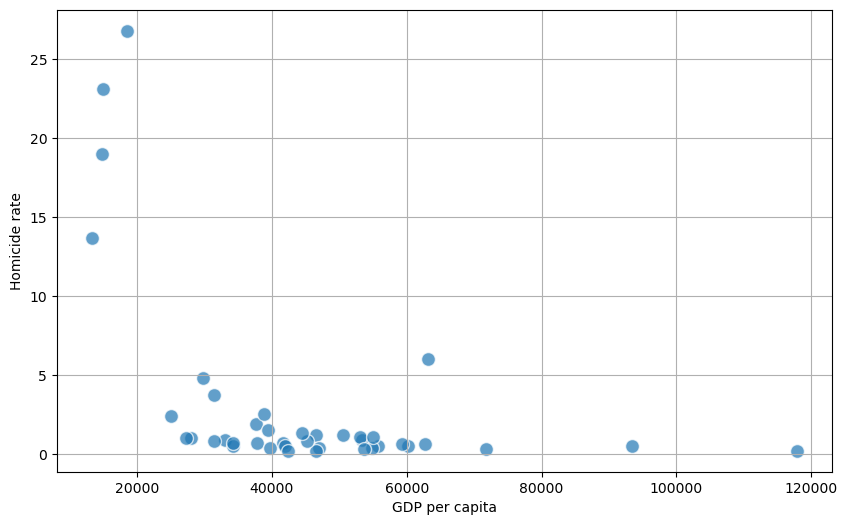

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df["GDP per capita"],
    df[strongest_positive_corr],
    alpha=0.7,
    edgecolors="w",
    s=100,
)
plt.xlabel("GDP per capita")
plt.ylabel(strongest_positive_corr)
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(
    df["GDP per capita"],
    df[strongest_negative_corr],
    alpha=0.7,
    edgecolors="w",
    s=100,
)
plt.xlabel("GDP per capita")
plt.ylabel(strongest_negative_corr)
plt.grid()
plt.show()

In [29]:
X = df["GDP per capita"]
y = df["Life satisfaction"]
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()

In [30]:
adjusted_r_squared = model.rsquared_adj
print(f"自由度調整済み決定係数: {adjusted_r_squared:.3f}")

自由度調整済み決定係数: 0.470


In [31]:
slope = model.params["GDP per capita"]
print(
    f"'GDP per capita'の値を1増やしたときの'Life satisfaction'の予測値の増加: {slope:.5f}"
)

'GDP per capita'の値を1増やしたときの'Life satisfaction'の予測値の増加: 0.00003


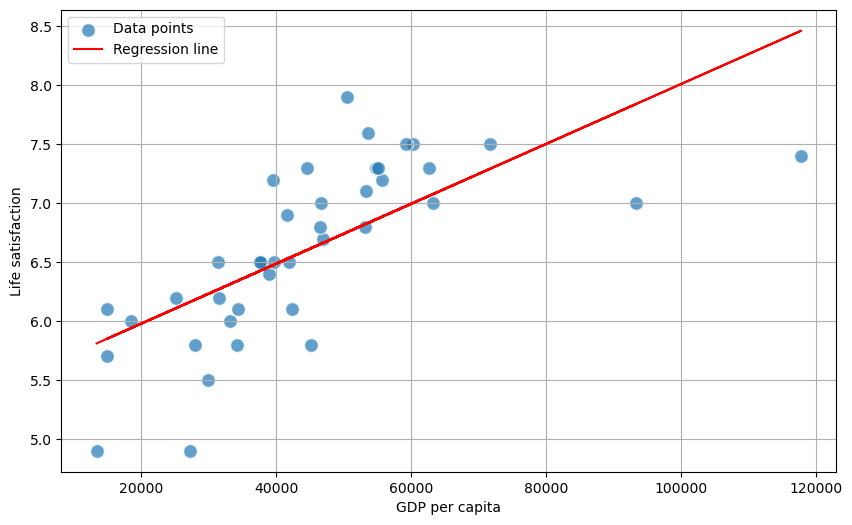

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df["GDP per capita"],
    df["Life satisfaction"],
    alpha=0.7,
    edgecolors="w",
    s=100,
    label="Data points",
)
plt.plot(
    df["GDP per capita"],
    model.predict(X),
    color="red",
    label="Regression line",
)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.legend()
plt.grid()
plt.show()

In [33]:
gdp_50000 = pd.DataFrame({"const": [1], "GDP per capita": [50000]})
predicted_life_satisfaction = model.predict(gdp_50000)
print(
    f"'GDP per capita'が50,000のときの'Life satisfaction'の予測値: {predicted_life_satisfaction[0]:.1f}"
)

'GDP per capita'が50,000のときの'Life satisfaction'の予測値: 6.7
